# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Архипов Дмитрий Алексеевич

In [37]:
from pprint import pprint
import warnings
import math
from typing import Any, Union

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    accuracy_score,
    classification_report, r2_score, mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV
)

In [2]:
warnings.filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [3]:

sop1: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/SOP1.dat",
        sep=" ",
        header=0
    )
)
sop1.name = "SOP1"

sop2: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/SOP2.dat",
        sep=" ",
        header=0
    )
)
sop2.name = "SOP2"

sop3: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/SOP3.dat",
        sep=" ",
        header=0
    )
)
sop3.name = "SOP3"

target1: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

target2: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

target3: pd.DataFrame = pd.DataFrame(
    pd.read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"


##  Отобразите несколько первых и несколько последних записей.

In [4]:
def printer(variable):
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [5]:
printer(sop1)
printer(sop2)
printer(sop3)
printer(target1)
printer(target2)
printer(target3)

'SOP1'

   0000  29-08-03  12:34:21  +20C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0        35   202          27          29   35           0   
1     2         0        23   190          27          22   29           0   
2     3         1         0   188          24          10   13           0   
3     4         5         0   183          26           6    1           0   
4     5         4         0   188          32           4    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11   16  Unnamed: 13  Unnamed: 14  \
0           0  255          147           54  119          125          212   
1           0  255          147           56   95          156          223   
2           0  255          145           59   40          172          254   
3           0  255          153           66   22          172          255   
4           0  255          157           62   18          170          255   

    5  ���1  Unnamed: 17  
0  17    39          

In [16]:
print(sop1.head())

   0000  29-08-03  12:34:21  +20C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0        35   202          27          29   35           0   
1     2         0        23   190          27          22   29           0   
2     3         1         0   188          24          10   13           0   
3     4         5         0   183          26           6    1           0   
4     5         4         0   188          32           4    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11   16  Unnamed: 13  Unnamed: 14  \
0           0  255          147           54  119          125          212   
1           0  255          147           56   95          156          223   
2           0  255          145           59   40          172          254   
3           0  255          153           66   22          172          255   
4           0  255          157           62   18          170          255   

    5  ���1  Unnamed: 17  
0  17    39          NaN  
1 

##  Ящик с усами.

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'12:34:21'}>,
        <AxesSubplot:title={'center':'+20C'}>],
       [<AxesSubplot:title={'center':'Unnamed: 4'}>,
        <AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>],
       [<AxesSubplot:title={'center':'Unnamed: 8'}>,
        <AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'���1'}>,
        <AxesSubplot:title={'center':'Unnamed: 17'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

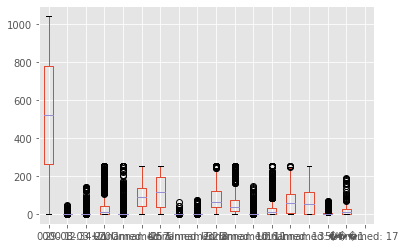

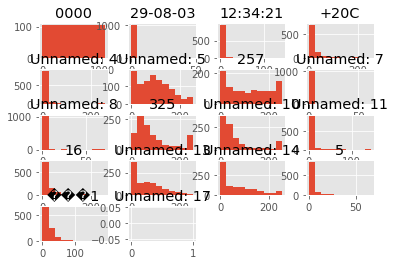

In [25]:
sop1.boxplot()
sop1.hist()

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:00:27'}>,
        <AxesSubplot:title={'center':'+23C'}>],
       [<AxesSubplot:title={'center':'Unnamed: 4'}>,
        <AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>],
       [<AxesSubplot:title={'center':'Unnamed: 8'}>,
        <AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'���2'}>,
        <AxesSubplot:title={'center':'Unnamed: 17'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

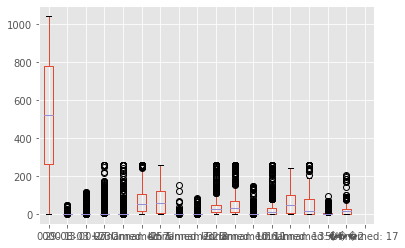

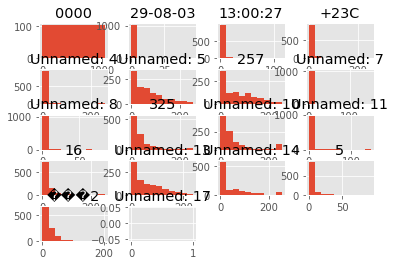

In [26]:
sop2.boxplot()
sop2.hist()

array([[<AxesSubplot:title={'center':'0000'}>,
        <AxesSubplot:title={'center':'29-08-03'}>,
        <AxesSubplot:title={'center':'13:49:13'}>,
        <AxesSubplot:title={'center':'+21C'}>],
       [<AxesSubplot:title={'center':'Unnamed: 4'}>,
        <AxesSubplot:title={'center':'Unnamed: 5'}>,
        <AxesSubplot:title={'center':'257'}>,
        <AxesSubplot:title={'center':'Unnamed: 7'}>],
       [<AxesSubplot:title={'center':'Unnamed: 8'}>,
        <AxesSubplot:title={'center':'325'}>,
        <AxesSubplot:title={'center':'Unnamed: 10'}>,
        <AxesSubplot:title={'center':'Unnamed: 11'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'Unnamed: 13'}>,
        <AxesSubplot:title={'center':'Unnamed: 14'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'���3'}>,
        <AxesSubplot:title={'center':'Unnamed: 17'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

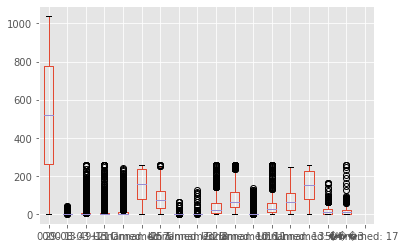

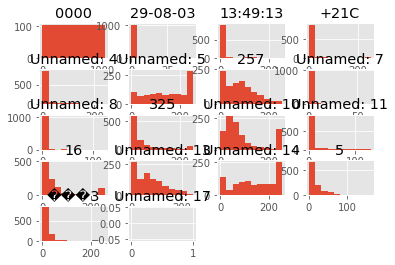

In [27]:
sop3.boxplot()
sop3.hist()


## Вектор с результатами наличия дефектов

In [86]:
list = [0]*sop1.count()[0]
ser1 = pd.Series(data=list)
ser2 = pd.Series(data=list)
ser3 = pd.Series(data=list)


0       0
1       0
2       0
3       0
4       0
       ..
1037    0
1038    0
1039    0
1040    0
1041    0
Length: 1042, dtype: int64


In [89]:
for inex, row in target1.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser1.loc[begin:int(end)] = 1

In [90]:
for inex, row in target2.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser2.loc[begin:int(end)] = 1

In [91]:
for inex, row in target3.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser3.loc[begin:int(end)] = 1

## Метод понижения размерности

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [92]:
for inex, row in target1.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser1.loc[begin:int(end)] = row['Высота дефекта']

In [93]:
for inex, row in target2.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser2.loc[begin:int(end)] = row['Высота дефекта']

In [94]:
for inex, row in target3.iterrows():
    begin = row['Начало дефекта']
    end = row['Начало дефекта'] + row['Длина дефекта']
    if (math.isnan(end)):
        pass
    else:
        ser3.loc[begin:int(end)] = row['Высота дефекта']

## Разбиение данных на обучающую и проверочную выборки

In [ ]:
var_train, var_test, target_train, target_test = train_test_split(var, target['data'], test_size=0.3, train_size=0.7)

## Последовательное применение алгоритмов

In [ ]:
# LogisticRegression
lr: LogisticRegression = LogisticRegression()
lr.fit(var_train, target_train)

In [ ]:
# SGDClassifier
sgdc: SGDClassifier = SGDClassifier()
sgdc.fit(var_train, target_train)

In [ ]:
# RidgeClassifier
rc: RidgeClassifier = RidgeClassifier()
rc.fit(var_train, target_train)


## Оценка качества модели

## Подбор гиперпараметров

In [ ]:
print("LogisticRegression")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid: GridSearchCV = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv=5
)
lr_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(lr_grid)

In [ ]:
print("SGDClassifier")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}
grid: GridSearchCV = GridSearchCV(
    SGDClassifier(),
    parameters,
    cv=5
)
sgd_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(sgd_grid)

In [ ]:
print("RidgeClassifier")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid: GridSearchCV = GridSearchCV(
    RidgeClassifier(),
    parameters,
    cv=5
)
rc_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(rc_grid)

## Заново обучите модель с подобранными гиперпараметрам

In [ ]:
def relearn(classifier, ttest, vtest) -> None:
    print(classifier.best_params_)
    print(classifier.best_score_)
    pred: object = classifier.predict(vtest)
    print(f"r2_score: {round(r2_score(ttest, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(ttest, pred), 3)}")

# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?